In [ ]:
!mkdir Airsim
!cp ./drive/Shareddrives/Sam/Datasets/AirSim.zip ./sample_data/

mkdir: cannot create directory ‘Airsim’: File exists


In [ ]:
!unzip ./sample_data/AirSim.zip -d ./Airsim/

Archive:  ./sample_data/AirSim.zip
replace ./Airsim/2022-03-03-17-59-44/airsim_rec.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


DATA_PATH = './Airsim'

In [ ]:
folders = os.listdir(DATA_PATH)
folders.sort()

In [ ]:
path = os.path.join(DATA_PATH, folders[20], 'airsim_rec.txt')
samples = pd.read_csv(path, sep='\t')

samples.head(1000)

,VehicleName,TimeStamp,POS_X,POS_Y,POS_Z,Q_W,Q_X,Q_Y,Q_Z,Throttle,Steering,Brake,Gear,Handbrake,RPM,Speed,ImageFile
0,PhysXCar,1646316954998,-0.000003,-0.000027,-0.585973,1.000000,0.000032,-8.412680e-12,-2.663160e-07,1.0,0.16000,0,0,0,2106.12,6.589230e-08,img_PhysXCar__0_1646316954997067000.png
1,PhysXCar,1646316955481,-0.000003,-0.000027,-0.584864,1.000000,0.000032,-8.412680e-12,-2.663160e-07,1.0,0.16000,0,0,0,2541.90,-6.777130e-08,img_PhysXCar__0_1646316955480376800.png
2,PhysXCar,1646316955963,-0.000003,-0.000026,-0.583702,1.000000,0.000032,-8.412680e-12,-2.663160e-07,1.0,0.16000,0,0,0,2971.10,4.092560e-08,img_PhysXCar__0_1646316955951059900.png
3,PhysXCar,1646316956444,-0.000003,-0.000026,-0.582978,1.000000,0.000032,-8.412680e-12,-2.663160e-07,1.0,0.16000,0,0,0,3393.80,1.751930e-07,img_PhysXCar__0_1646316956442625100.png
4,PhysXCar,1646316956921,-0.000003,-0.000026,-0.582521,1.000000,0.000032,-8.412680e-12,-2.663160e-07,1.0,0.16000,0,0,0,3451.94,3.089580e-07,img_PhysXCar__0_1646316956920821300.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,PhysXCar,1646317006031,129.082000,-37.187700,-0.586942,0.678674,0.004766,-2.400820e-03,-7.344200e-01,1.0,-0.16625,0,3,0,4273.05,1.587590e+01,img_PhysXCar__0_1646317006030196500.png
136,PhysXCar,1646317006380,128.943000,-38.777200,-0.586893,0.670384,0.005226,-3.223810e-03,-7.419890e-01,1.0,0.00000,0,3,0,4277.64,1.612610e+01,img_PhysXCar__0_1646317006378315000.png
137,PhysXCar,1646317006729,128.785000,-40.389600,-0.586929,0.667790,0.005049,-2.852900e-03,-7.443270e-01,1.0,0.00000,0,3,0,4286.55,1.634840e+01,img_PhysXCar__0_1646317006728404800.png
138,PhysXCar,1646317007077,128.613000,-42.023400,-0.586895,0.667261,0.004330,-2.216230e-03,-7.448080e-01,1.0,0.00000,0,3,0,4299.84,1.658960e+01,img_PhysXCar__0_1646317007076198700.png


In [ ]:
X = samples["POS_X"].to_numpy()
Y = samples["POS_Y"].to_numpy()
Z = samples["POS_Z"].to_numpy()
throt = samples['Throttle'].to_numpy()
steer = samples['Steering'].to_numpy()
brake = samples['Brake'].to_numpy()
speed = samples['Speed'].to_numpy()

In [ ]:
def smooth(points, box_pts):
    box = np.ones(box_pts)/box_pts
    points_smooth = np.convolve(points, box, mode='same')
    return points_smooth

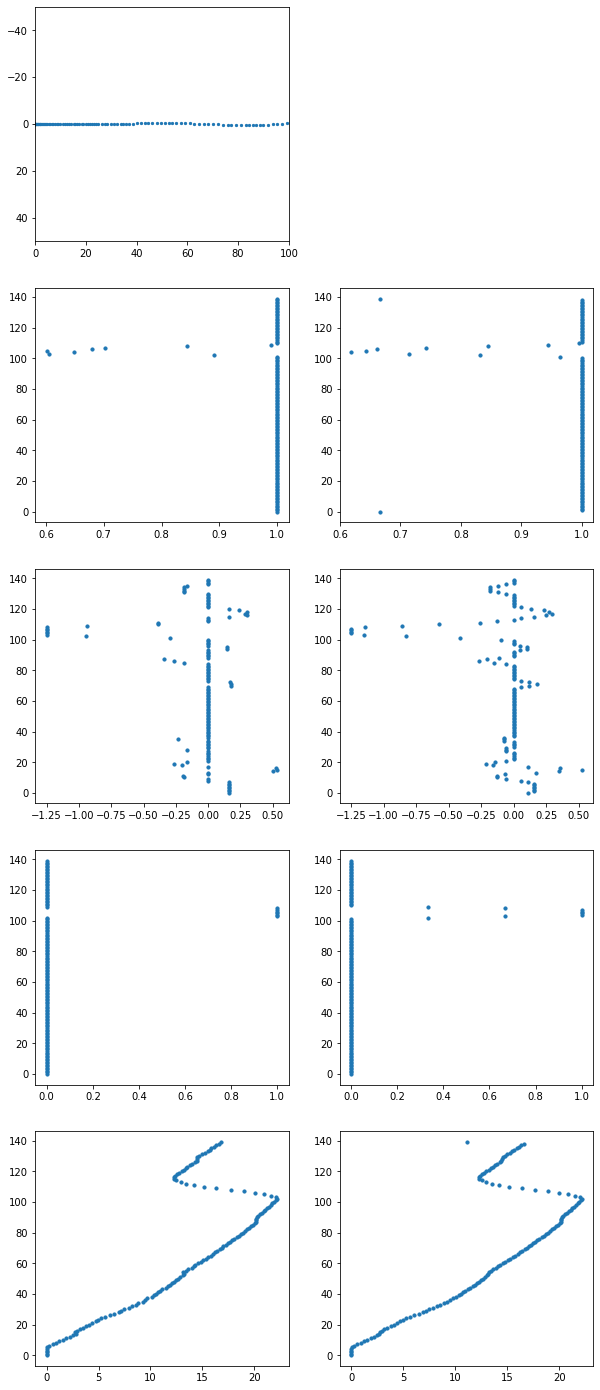

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 25))
axes[0,0].scatter(X,Y, s=5)
axes[0,0].set_xlim(0, 100)
axes[0,0].set_ylim(50, -50)
axes[0,1].axis('off')

axes[1,0].scatter(throt, np.arange(steer.shape[0]), s=10)
axes[1,1].scatter(smooth(throt, 3), np.arange(steer.shape[0]), s=10)

axes[2,0].scatter(steer, np.arange(steer.shape[0]), s=10)
axes[2,1].scatter(smooth(steer, 3), np.arange(steer.shape[0]), s=10)

axes[3,0].scatter(brake, np.arange(brake.shape[0]), s=10)
axes[3,1].scatter(smooth(brake, 3), np.arange(brake.shape[0]), s=10)

axes[4,0].scatter(speed, np.arange(speed.shape[0]), s=10)
axes[4,1].scatter(smooth(speed, 3), np.arange(speed.shape[0]), s=10)

plt.show()